<a href="https://colab.research.google.com/github/yuaquintero/U4-Project-CNN/blob/master/Copia_de_CNN_Scene_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import os
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K
import cv2

In [2]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
import keras

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

## Load data

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q" -O intel-image-classification.zip && rm -rf /tmp/cookies.txt

--2020-05-01 14:15:02--  https://docs.google.com/uc?export=download&confirm=YYyc&id=1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q
Resolving docs.google.com (docs.google.com)... 74.125.143.138, 74.125.143.102, 74.125.143.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.143.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-0g-docs.googleusercontent.com/docs/securesc/un2sgcstas5rf8ms0qk4mpmhof0fs91j/vnkcfpkr872nfue7skbvi1fb4b2duii2/1588342500000/12257531938772176428/14812127708663821224Z/1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q?e=download [following]
--2020-05-01 14:15:02--  https://doc-00-0g-docs.googleusercontent.com/docs/securesc/un2sgcstas5rf8ms0qk4mpmhof0fs91j/vnkcfpkr872nfue7skbvi1fb4b2duii2/1588342500000/12257531938772176428/14812127708663821224Z/1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q?e=download
Resolving doc-00-0g-docs.googleusercontent.com (doc-00-0g-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connectin

https://drive.google.com/file/d/1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q/view?usp=sharing

In [5]:
!mkdir data
!unzip intel-image-classification.zip -d data/

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: data/seg_train/seg_train/mountain/7537.jpg  
  inflating: data/seg_train/seg_train/mountain/7539.jpg  
  inflating: data/seg_train/seg_train/mountain/7551.jpg  
  inflating: data/seg_train/seg_train/mountain/7560.jpg  
  inflating: data/seg_train/seg_train/mountain/7565.jpg  
  inflating: data/seg_train/seg_train/mountain/7578.jpg  
  inflating: data/seg_train/seg_train/mountain/7581.jpg  
  inflating: data/seg_train/seg_train/mountain/7586.jpg  
  inflating: data/seg_train/seg_train/mountain/7647.jpg  
  inflating: data/seg_train/seg_train/mountain/7652.jpg  
  inflating: data/seg_train/seg_train/mountain/7654.jpg  
  inflating: data/seg_train/seg_train/mountain/7662.jpg  
  inflating: data/seg_train/seg_train/mountain/767.jpg  
  inflating: data/seg_train/seg_train/mountain/7672.jpg  
  inflating: data/seg_train/seg_train/mountain/7679.jpg  
  inflating: data/seg_train/seg_train/mountain/7681.jpg  
  inflating:

In [0]:
data_train = './data/seg_train/seg_train'
data_test = './data/seg_test/seg_test'

Image size, labels class and number class

In [0]:
ImageHeight, ImageWeithg= 150, 150
classes=6
labels_class = {0:'buildings', 1:'forest', 2:'glacier',3:'mountain',4:'sea', 5:'street'}

Load images for new prection

In [0]:
Image_New_pred=[]
dire='./data/seg_pred/seg_pred/'
for image_file in os.listdir( './data/seg_pred/seg_pred'): 
            image = cv2.imread(dire+image_file) 
            image =  load_img(dire+image_file, target_size=(ImageHeight, ImageWeithg))
            Image_New_pred.append(image)

# Prepare data

In [0]:
from keras.preprocessing.image import load_img, img_to_array
import os

## Convert images into array

In [0]:
def get_images(directory):
    Images = []
    Labels = [] 
    for labels in os.listdir(directory):
         if labels == 'buildings':
            label = 0
         elif labels == 'forest':
            label = 1   
         elif  labels == 'glacier': 
            label = 2
         elif labels == 'mountain':
            label = 3   
         elif labels == 'sea':
            label = 4   
         elif labels == 'street':
            label = 5    
         for image_file in os.listdir(directory+'/'+labels): 
            image = cv2.imread(directory+ '/'+labels+'/'+image_file) 
            image = cv2.resize(image,(150,150))/255 
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=1000) 

##Create set for train

In [0]:
x_train,y_train = get_images('./data/seg_train/seg_train')
x_train = np.array(x_train)
y_train= np.array(y_train)

In [8]:
print(x_train.shape)
print(y_train.shape)

(14034, 150, 150, 3)
(14034,)


##Create set for test

In [0]:
x_test,y_test = get_images(data_test)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [10]:
print(x_test.shape)
print(y_test.shape)

(3000, 150, 150, 3)
(3000,)



### observe number of images per class

<Figure size 1440x1440 with 0 Axes>

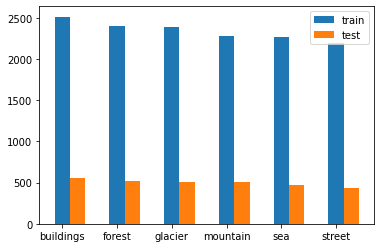

In [11]:
counts_train=pd.Series(y_train).value_counts()
counts_test=pd.Series(y_test).value_counts()
plt.figure(figsize=(20,20))
width=0.28
labels=['buildings', 'forest', 'glacier','mountain','sea','street']
x=np.arange(classes)
fig,ax=plt.subplots()
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,counts_train, width, label='train')
ax.bar(x+0.28,counts_test, width, label='test')
ax.legend()

Show some images with their respective classes

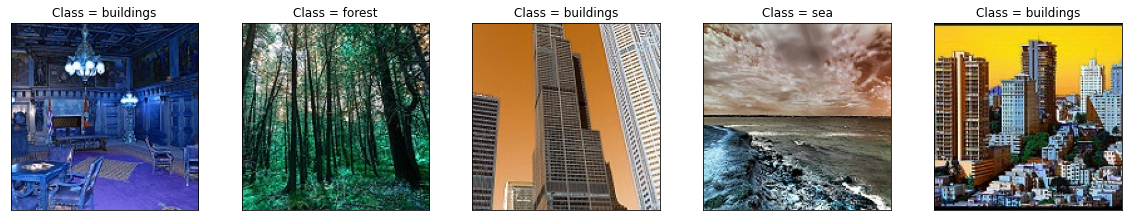

In [13]:
fig = plt.figure(figsize = (20,20))
for i in range(5):  
  index = np.random.randint(x_train.shape[0])
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title("Class = "+labels_class[y_train[index]])
  plt.imshow(x_train[index])


# Build Models

 Firts model

*   First convolutional layer : 32 filters, filter size (3,3)
*   Second convolutional layer : 64 filters, filter size (2,2)

In [0]:
cnn_model = Sequential()
cnn_model.add(Convolution2D(32, kernel_size=(3,3), padding ="same", input_shape=(ImageHeight, ImageWeithg, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Convolution2D(64, kernel_size=(2,2), padding ="same"))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(6, activation='softmax'))
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               22429952  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [15]:
trained = cnn_model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/10
220/220 [==============================] - 191s 868ms/step - loss: 1.5706 - accuracy: 0.5371 - val_loss: 0.9549 - val_accuracy: 0.6427
Epoch 2/10
220/220 [==============================] - 194s 881ms/step - loss: 0.8692 - accuracy: 0.6834 - val_loss: 0.7337 - val_accuracy: 0.7573
Epoch 3/10
220/220 [==============================] - 195s 885ms/step - loss: 0.6898 - accuracy: 0.7493 - val_loss: 0.7044 - val_accuracy: 0.7487
Epoch 4/10
220/220 [==============================] - 190s 866ms/step - loss: 0.5475 - accuracy: 0.8064 - val_loss: 0.6695 - val_accuracy: 0.7703
Epoch 5/10
220/220 [==============================] - 191s 870ms/step - loss: 0.4340 - accuracy: 0.8464 - val_loss: 0.6260 - val_accuracy: 0.7853
Epoch 6/10
220/220 [==============================] - 191s 868ms/step - loss: 0.3571 - accuracy: 0.8715 - val_loss: 0.7241 - val_accuracy: 0.7537
Epoch 7/10
220/220 [==============================] - 192s 873ms/step - loss: 0.2477 - accuracy: 0.9159 - val_loss: 0.6085 -

## Some functions to print 

  function to print confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def Print_Confusion_matrix(y_test, preds_test):
  class_names = {'buildings','forest', 'glacier','mountain','sea', 'street'}
  cm=confusion_matrix(y_test, preds_test)
  cm = cm/np.sum(cm,axis=0)
  cmap = plt.cm.Blues
  tick_marks = np.arange(classes)
  fig, ax = plt.subplots(figsize=(5,5))
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
  plt.title('Normalized confusion matrix')
  fig.colorbar(im)
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names);
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title('Normalized confusion matrix')

In [0]:
def Print_Epoch_inTrain(trained):
  plt.figure(figsize=(10,3))
  plt.subplot(121)
  loss  = trained.history["loss"]
  vloss = trained.history["val_loss"]
  plt.plot(loss, lw=4, alpha=.5, label="loss")
  plt.plot(vloss, lw=4, alpha=.5, label="val loss")
  plt.grid();
  plt.legend();
  plt.subplot(122)
  accu = trained.history["accuracy"]
  vaccu = trained.history["val_accuracy"]
  plt.plot(accu, lw=4, alpha=.5, label="accuracy")
  plt.plot(vaccu, lw=4, alpha=.5, label="val_accuracy")
  plt.grid();
  plt.legend();

In [0]:
 #Get a new images and show the class
 def Show_new_prediction(img, model):
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  answer = np.argmax(array)
  fig = plt.figure(figsize = (4,4))
  plt.xticks([])
  plt.yticks([])
  plt.title("Class = "+labels_class[answer])
  plt.imshow(img)

## Eval permorfance

In [18]:
# Show accuracy
preds_train = cnn_model.predict(x_train).argmax(axis=1)
preds_test = cnn_model.predict(x_test).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

accuracy train 0.993
accuracy test  0.795


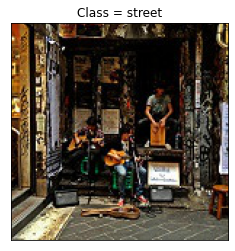

In [116]:
# Calculate a class for a random image
index=np.random.randint(len(Image_New_pred))
im=Image_New_pred[index]
Show_new_prediction(im, cnn_model)

### confusion matrix

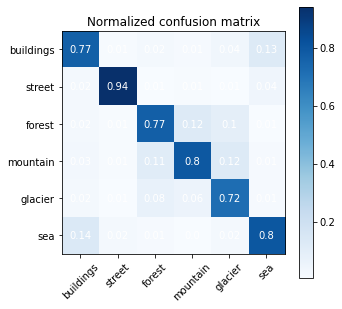

In [117]:
#show confusion matrix
Print_Confusion_matrix(y_test, preds_test)

Show loss in epochs train

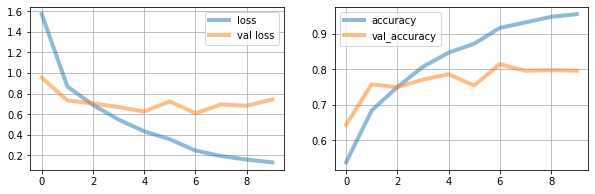

In [129]:
Print_Epoch_inTrain(trained)

Overfit is evident so wiil be doing transformations using Keras ImageDataGenerator class

Doing transformations

In [0]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [0]:
train_gen= datagen.flow(x_train, y_train, batch_size=64)
val_gen = datagen.flow(x_train, y_train, batch_size=64)

### Train again

In [121]:
trained_2=cnn_model.fit(
    train_gen,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_gen,
    validation_steps=100
    )

Epoch 1/10
100/100 [==============================] - 142s 1s/step - loss: 0.9642 - accuracy: 0.6506 - val_loss: 0.7768 - val_accuracy: 0.7216
Epoch 2/10
100/100 [==============================] - 141s 1s/step - loss: 0.8646 - accuracy: 0.6828 - val_loss: 0.7437 - val_accuracy: 0.7278
Epoch 3/10
100/100 [==============================] - 141s 1s/step - loss: 0.8624 - accuracy: 0.6815 - val_loss: 0.7167 - val_accuracy: 0.7499
Epoch 4/10
100/100 [==============================] - 142s 1s/step - loss: 0.8303 - accuracy: 0.6964 - val_loss: 0.7073 - val_accuracy: 0.7464
Epoch 5/10
100/100 [==============================] - 141s 1s/step - loss: 0.8280 - accuracy: 0.7033 - val_loss: 0.6889 - val_accuracy: 0.7476
Epoch 6/10
100/100 [==============================] - 145s 1s/step - loss: 0.7880 - accuracy: 0.7178 - val_loss: 0.6647 - val_accuracy: 0.7545
Epoch 7/10
100/100 [==============================] - 142s 1s/step - loss: 0.7906 - accuracy: 0.7081 - val_loss: 0.6458 - val_accuracy: 0.7710

### Eval permorfance again

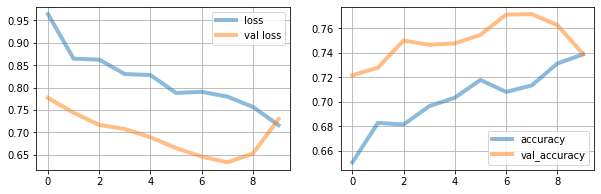

In [130]:
Print_Epoch_inTrain(trained_2)

In [0]:
preds_train = cnn_model.predict(x_train).argmax(axis=1)
preds_test = cnn_model.predict(x_test).argmax(axis=1)

In [132]:
print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

accuracy train 0.895
accuracy test  0.774


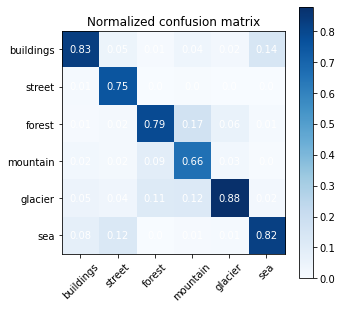

In [133]:
Print_Confusion_matrix(y_test, preds_test)

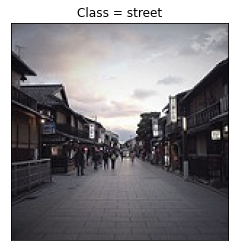

In [134]:
# Calculate a class for a random image
index=np.random.randint(len(Image_New_pred))
im=Image_New_pred[index]
Show_new_prediction(im, cnn_model)